In [ ]:
# Necessary Modules

import pandas as pd
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm

c:\Users\Acer\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# create dataframe
file=pd.read_csv('Customer_Churn.csv')

In [3]:
# check df
file.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# df stats
file.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
# check empty values
file.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
# check column data types
file.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
# churn
churn_mapping={'Yes':1,'No':0}
chu_map=file.Churn.map(churn_mapping)
file['Churn']=chu_map

1    3555
0    3488
Name: gender, dtype: int64


<Axes: xlabel='gender', ylabel='count'>

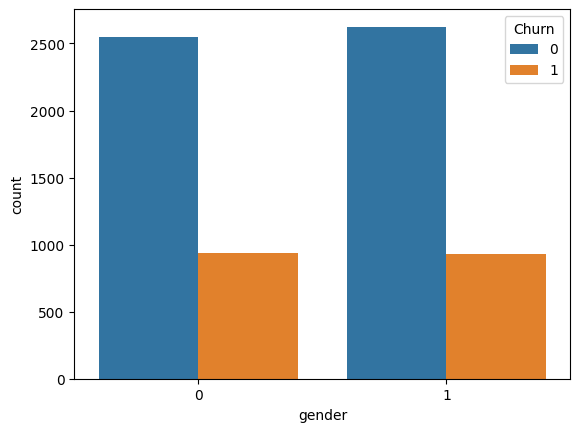

In [8]:
# gender
gender_mapping={'Male':1,'Female':0}
gen_map=file.gender.map(gender_mapping)
file.gender=gen_map
print(gen_map.value_counts())

sb.countplot(x=gen_map, hue=chu_map, data=file)

<Axes: xlabel='SeniorCitizen', ylabel='count'>

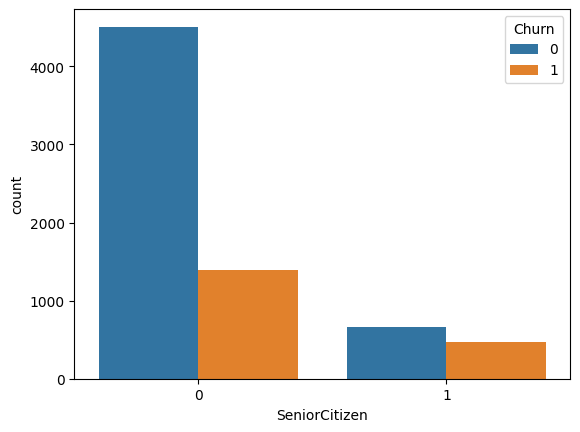

In [9]:
# senior citizen
sb.countplot(x=file.SeniorCitizen,hue=chu_map)

<Axes: xlabel='tenure', ylabel='Churn'>

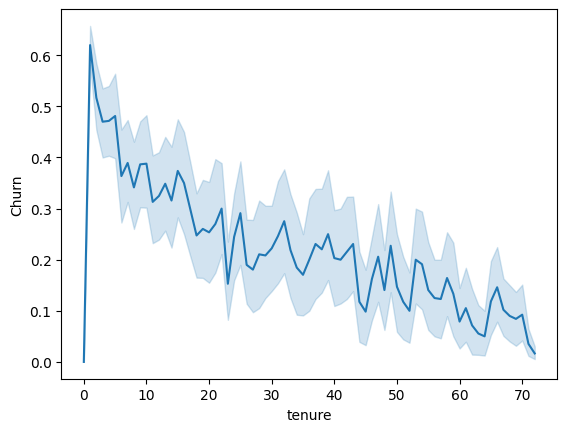

In [10]:
# tenure
sb.lineplot(x=file.tenure,y=chu_map)

<Axes: xlabel='PhoneService', ylabel='count'>

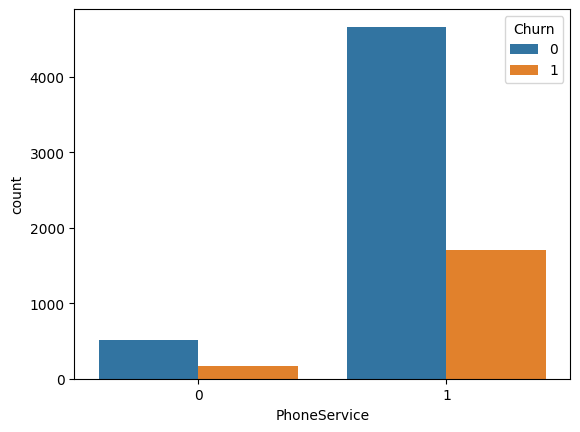

In [11]:
#  Phone service
phone_service_mapping={'Yes':1,'No':0}
ph_se_map=file.PhoneService.map(phone_service_mapping)
file.PhoneService=ph_se_map

sb.countplot(x=ph_se_map,hue=chu_map)

<Axes: xlabel='MultipleLines', ylabel='count'>

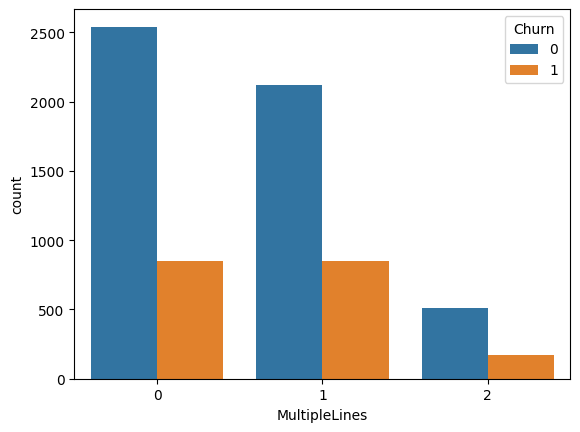

In [12]:
# multiple lines
multiple_lines_mapping={'Yes':1,'No':0,'No phone service':2}
mu_li_map=file.MultipleLines.map(multiple_lines_mapping)
file.MultipleLines=mu_li_map

sb.countplot(x=mu_li_map,hue=chu_map)

<Axes: xlabel='InternetService', ylabel='count'>

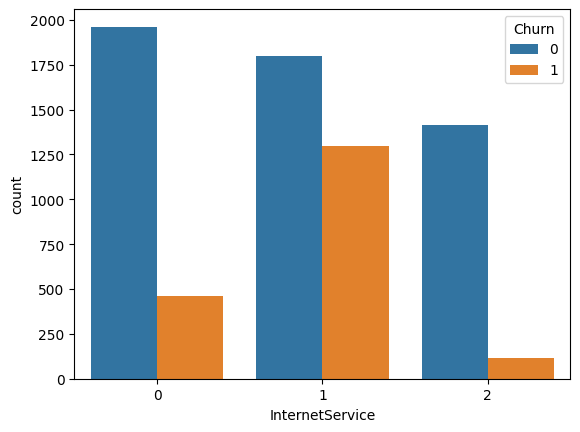

In [13]:
# internet service
internet_service_mapping={'DSL':0,'Fiber optic':1,'No':2}
in_se_map=file.InternetService.map(internet_service_mapping)
file.InternetService=in_se_map
sb.countplot(x=in_se_map,hue=chu_map)

<Axes: xlabel='Contract', ylabel='count'>

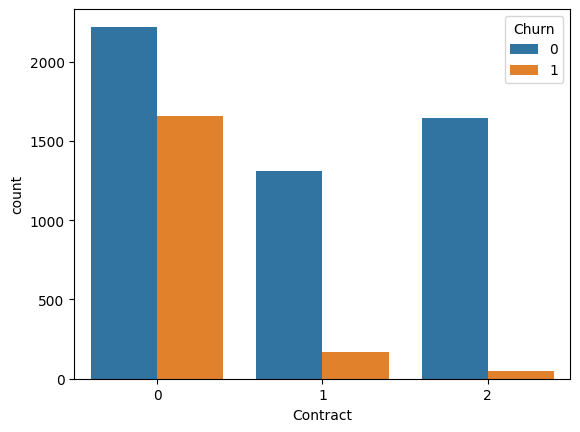

In [14]:
# contract
file.Contract.unique()
contract_mapping={'Month-to-month':0,'One year':1,'Two year':2}
co_map=file.Contract.map(contract_mapping)
file.Contract=co_map
sb.countplot(x=co_map,hue=chu_map)

<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

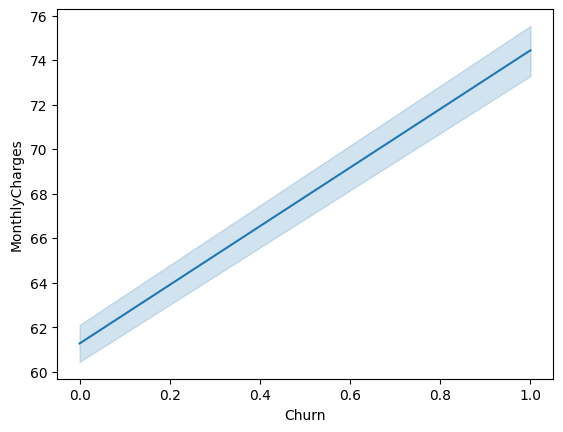

In [15]:
# monthly charges
sb.lineplot(x=chu_map,y=file.MonthlyCharges)

In [16]:
X=file.drop(columns=['customerID','Partner','Dependents','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','PaymentMethod','TotalCharges','Churn']).astype('float64')
y=file.Churn

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [17]:
reg=LogisticRegression(random_state=42)
reg.fit(X_train,y_train)


c:\Users\Acer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [18]:
log_reg_val_pred=reg.predict(X_test)
accuracy_score(log_reg_val_pred,y_test)

0.7971631205673759

In [19]:
tr=DecisionTreeClassifier(random_state=42)
tr.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [20]:
dt_val_pred=tr.predict(X_test)
accuracy_score(dt_val_pred,y_test)

0.7163120567375887

In [21]:
sv=svm.SVC(kernel='linear',random_state=42)
sv.fit(X_train,y_train)

SVC(kernel='linear', random_state=42)

In [22]:
sv_val_pred=sv.predict(X_test)
accuracy_score(sv_val_pred,y_test)

0.798581560283688